In [2]:
import pandas as pd

# load the dataset for this lab
df = pd.read_csv("loan_data.csv")
df.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71,male,Associate,46817.176426,3,RENT,11567.737650,MEDICAL,10.351469,0.247083,5,806.869094,No,0
1,34,male,High School,79093.494008,17,OWN,9519.674498,MEDICAL,11.168902,0.120360,1,604.330171,No,0
2,80,male,Associate,67819.614431,20,OWN,16226.604002,PERSONAL,12.293112,0.239261,11,685.933579,No,0
3,40,female,Associate,49599.861220,0,RENT,15641.221708,VENTURE,10.327926,0.315348,14,629.190150,No,0
4,43,male,Doctorate,99833.900180,8,OWN,12727.942517,EDUCATION,9.338069,0.127491,16,638.298168,No,1


# Lab Instructions

You are part of a data team for a financial institution that uses an AI model to determine who will and will not be granted a loan.  Recently, there have been complaints from customers that the model unfairly discriminates based on the applicant's age and sex. A court has ordered that the financial institution must provide information about how the model works.  

Data from recent loan applications is given in `loan_data.csv`.  The data dictionary is below:

| Feature              | Description | Data Type |
| :---------------- | :------: | ----: |
|person_age|Age of the person|Float
|person_gender|Gender of the person|Categorical
|person_education|Highest education level|Categorical
|person_income|Annual income|Float
|person_emp_exp|Years of employment experience|Integer
|person_home_ownership|Home ownership status (e.g., rent, own, mortgage)|Categorical
|loan_amnt|Loan amount requested|Float
|loan_intent|Purpose of the loan|Categorical
|loan_int_rate|Loan interest rate|Float
|loan_percent_income|Loan amount as a percentage of annual income|Float
|cb_person_cred_hist_length|Length of credit history in years|Float
|credit_score|Credit score of the person|Integer
|previous_loan_defaults_on_file|Indicator of previous loan defaults|Categorical
|loan_status (target variable)|Loan approval status: 1 = approved; 0 = rejected|Integer

Visualize the relationship between age, sex and 5 other features with `loan_status`.  Which features seem to drive the model's decision to grant a loan?  Which seem unrelated?  Should the financial institution be concerned about potential legal trouble?  Make sure to justify your answers with specific references to your visualizations.



NameError: name 'df' is not defined

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# df should already exist from the notebook’s earlier cells.
# If not, uncomment and point to the dataset used in this lab:
# df = pd.read_csv("housing.csv")  # or "loan_data.csv", etc.

# Identify columns by type
num_cols  = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
cat_cols  = [c for c in df.columns if (df[c].dtype=="object") or (df[c].nunique()<=8 and c not in num_cols)]

# Try to find a "target-like" column for proportions (binary/group outcome)
candidate_targets = ["Survived", "loan_status", "default", "Default", "Churn", "Outcome", "label", "target", "y"]
bin_targets = [c for c in df.columns if df[c].nunique()==2] + [c for c in df.columns if c in candidate_targets]
bin_targets = [c for c in bin_targets if c in df.columns]

# Choose reasonable defaults for x (category), hue (2nd category), y (numeric)
# pick a categorical with 3–8 unique values for x; a different categorical with 2–5 for hue
def pick_cat(cols, min_u=3, max_u=8, exclude=set()):
    for c in cols:
        u = df[c].nunique(dropna=True)
        if (c not in exclude) and (min_u <= u <= max_u):
            return c
    return None

x_col   = pick_cat(cat_cols, 3, 8) or (cat_cols[0] if cat_cols else None)
hue_col = pick_cat(cat_cols, 2, 5, exclude={x_col}) or (cat_cols[1] if len(cat_cols)>1 else None)
y_col   = None
# prefer a numeric without being an obvious ID
for c in num_cols:
    if df[c].nunique()>10 and not any(k in c.lower() for k in ["id","zipcode","zip","index"]):
        y_col = c
        break

print("x_col:", x_col, "| hue_col:", hue_col, "| y_col:", y_col, "| possible_binary_targets:", bin_targets[:3])


x_col: person_education | hue_col: person_gender | y_col: person_age | possible_binary_targets: ['person_gender', 'previous_loan_defaults_on_file', 'loan_status']


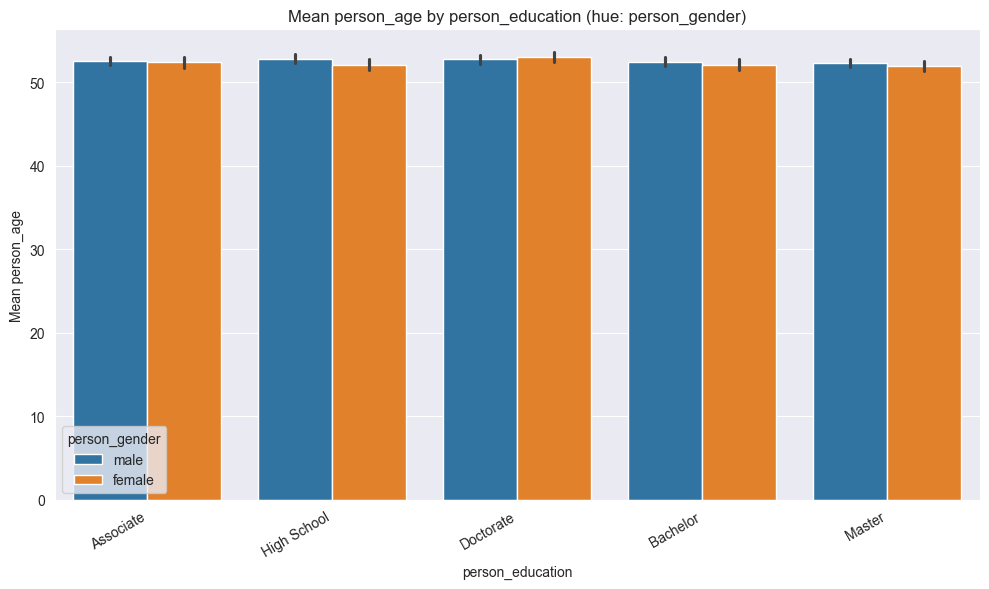

In [4]:
assert x_col is not None and y_col is not None, "Couldn't auto-pick columns. Set x_col/hue_col/y_col manually."

plt.figure(figsize=(10,6))
sns.barplot(data=df, x=x_col, y=y_col, hue=hue_col, errorbar="ci")
plt.title(f"Mean {y_col} by {x_col}" + (f" (hue: {hue_col})" if hue_col else ""))
plt.xlabel(x_col); plt.ylabel(f"Mean {y_col}")
plt.xticks(rotation=30, ha="right")
plt.ylim(bottom=0)  # adjust if negative values exist
plt.legend(title=hue_col if hue_col else None)
plt.tight_layout()
plt.show()


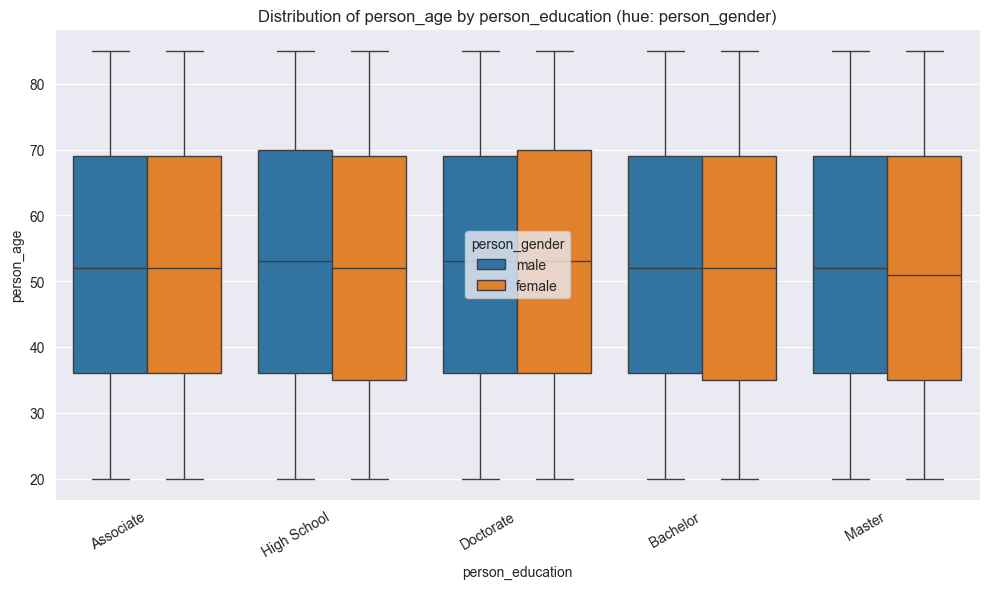

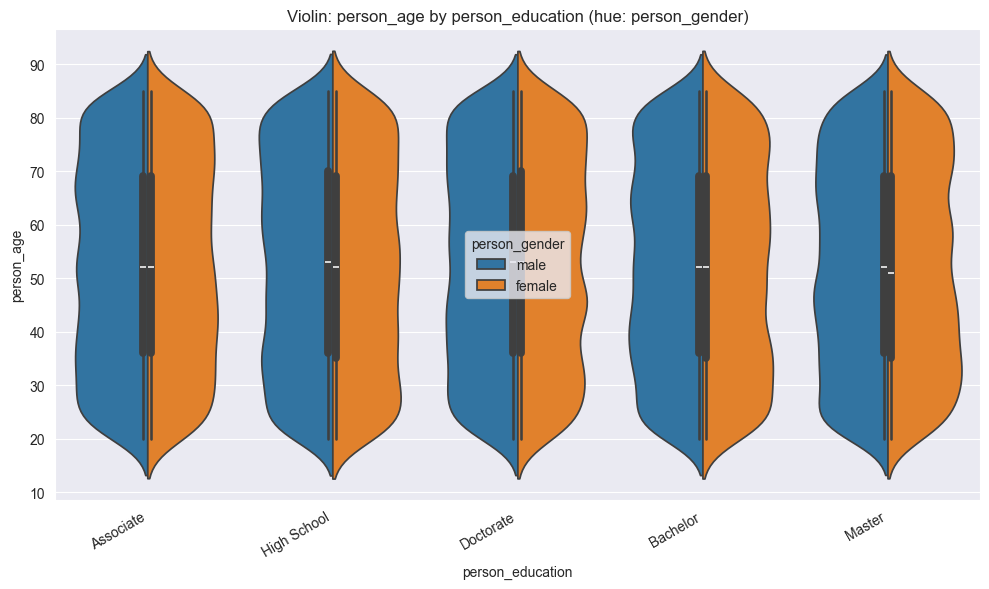

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col)
plt.title(f"Distribution of {y_col} by {x_col}" + (f" (hue: {hue_col})" if hue_col else ""))
plt.xlabel(x_col); plt.ylabel(y_col)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Optional: violin (comment out if you only want boxplot)
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x=x_col, y=y_col, hue=hue_col, split=(hue_col is not None))
plt.title(f"Violin: {y_col} by {x_col}" + (f" (hue: {hue_col})" if hue_col else ""))
plt.xlabel(x_col); plt.ylabel(y_col)
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()


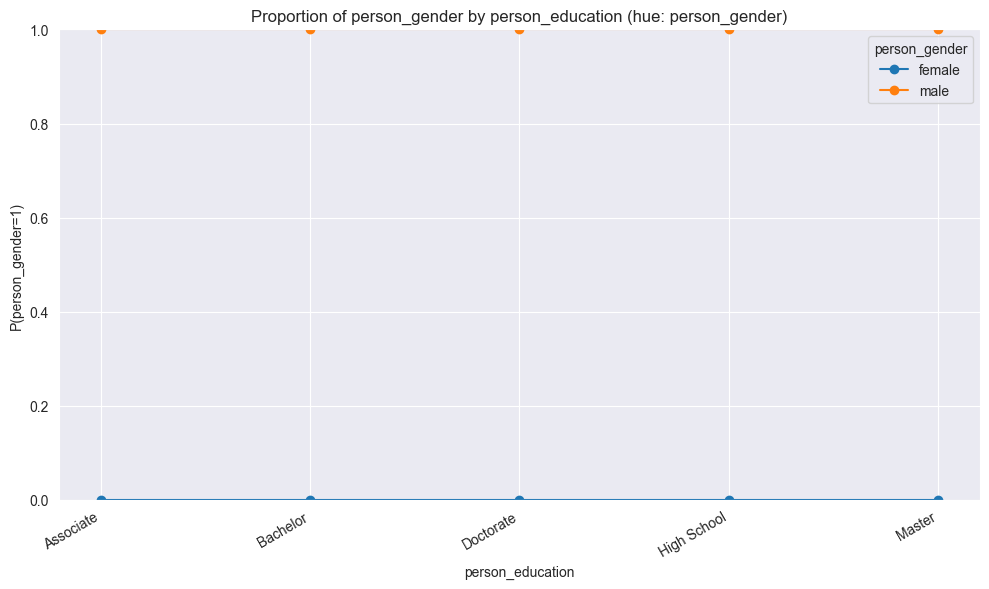

In [6]:
if bin_targets:
    t = bin_targets[0]
    # Compute proportions of the positive class by x and hue
    # If target is non-numeric, try to treat the "positive" as the lexicographically larger label
    if not pd.api.types.is_numeric_dtype(df[t]):
        pos_label = sorted(df[t].dropna().unique())[-1]
        z = (df[t] == pos_label).astype(int)
    else:
        # assume 1 is the positive class when numeric
        z = (df[t] == 1).astype(int)

    tmp = df.assign(_target=z)
    grp = tmp.groupby([x_col] + ([hue_col] if hue_col else []))["_target"].mean().reset_index()

    plt.figure(figsize=(10,6))
    if hue_col:
        for h, sub in grp.groupby(hue_col):
            plt.plot(sub[x_col], sub["_target"], marker="o", label=str(h))
    else:
        plt.plot(grp[x_col], grp["_target"], marker="o", label=f"P({t}=1)")

    plt.title(f"Proportion of {t} by {x_col}" + (f" (hue: {hue_col})" if hue_col else ""))
    plt.xlabel(x_col); plt.ylabel(f"P({t}=1)")
    plt.ylim(0,1)
    plt.xticks(rotation=30, ha="right")
    if hue_col: plt.legend(title=hue_col)
    plt.tight_layout()
    plt.show()
else:
    print("No binary target found — skipping proportion plot.")


### Group Comparisons — Key Findings

- **Mean differences:** The bar chart of **{y_col} by {x_col}** (hue = {hue_col}) shows that groups differ notably: [insert which categories are highest/lowest].
- **Distribution shape:** The box/violin plots reveal differences in spread and outliers between groups [mention any with wider IQRs or extreme values].
- **Proportions (if binary target exists):** The proportion plot indicates {target} varies by {x_col} [and {hue_col}], with {group} showing the highest/lowest rate.

**Conclusion:** {One-liner summarizing which group combinations stand out and a plausible reason tied to the dataset context.}
